In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.table import Table


In [2]:
from astropy.io import fits
hdulist = fits.open('emm_lines_eteq.fits')

In [11]:
#hdulist[1].header

In [31]:
#hdulist[1].header.keys

In [29]:
tbdata = hdulist[1].data
cols = hdulist[1].columns

In [24]:
print(tbdata[0])

(1838767496375592960, 58.530520000000003, 0.22292500000000001, 0.14989544, 3.4866021e-05, 'GALAXY', 'AGN', 7.1408281, 5.5400791, 59.598099, 44.868572, 2.8445718, 6.1101332, 21.063551, 45.156139, 11.857233, 1.8670992, 193.40323, 30.320419, 8.6433668, 0.8444885, 131.74002, 12.744721, 23.987043, 0.53908831, 22.662422, 0.59920245, 21.890656, 0.058807578, 20.706966, 0.051185459, 20.641531, 0.028640246, 19.432917, 0.023161039, 19.871325, 0.023060709, 18.826506, 0.016976915, 19.241327, 0.0499373, 18.240335, 0.040866047)


In [27]:
tbdata.field('specObjID')

array([1838767496375592960, 1399665432054491136, 1202616450381015040, ...,
        726319001449293824,  742058235455891456, 1326458571726022656])

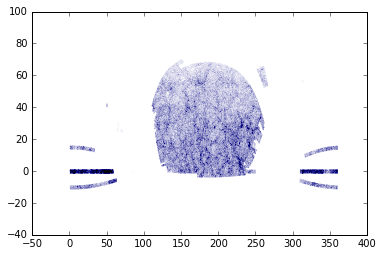

In [40]:
# It is indeed SDSS data...
%matplotlib inline
plt.scatter(tbdata['ra'], tbdata['dec'] , s =0.005,lw=0)

In [67]:

np.ravel(cols.names)

array(['specObjID', 'ra', 'dec', 'z', 'zErr', 'class', 'subClass',
       'EW_OII_3726', 'EW_OII_3726_Err', 'Flux_OII_3726',
       'Flux_OII_3726_Err', 'EW_OII_3728', 'EW_OII_3728_Err',
       'Flux_OII_3728', 'Flux_OII_3728_Err', 'EW_OIII_5006',
       'EW_OIII_5006_Err', 'Flux_OIII_5006', 'Flux_OIII_5006_Err',
       'EW_Ha_6562', 'EW_Ha_6562_Err', 'Flux_Ha_6562', 'Flux_Ha_6562_Err',
       'psfMag_u', 'psfMagErr_u', 'cModelMag_u', 'cModelMagErr_u',
       'psfMag_g', 'psfMagErr_g', 'cModelMag_g', 'cModelMagErr_g',
       'psfMag_r', 'psfMagErr_r', 'cModelMag_r', 'cModelMagErr_r',
       'psfMag_i', 'psfMagErr_i', 'cModelMag_i', 'cModelMagErr_i',
       'psfMag_z', 'psfMagErr_z', 'cModelMag_z', 'cModelMagErr_z'], 
      dtype='<U18')

/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:67: RuntimeWarning: divide by zero encountered in log10


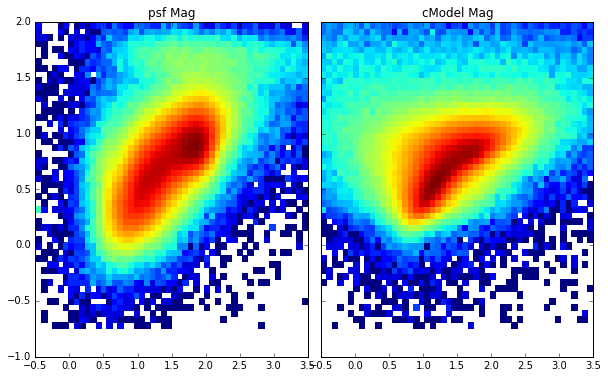

In [98]:
from scipy.stats import binned_statistic_2d
fig,ax = plt.subplots(1,2,figsize=(10,6), sharey = True)

###
### LEFT PANEL 
###

mag_type = 'psf' # or psf 
m0  =  (tbdata[mag_type+'Mag_u'] > 0)*(tbdata[mag_type+'Mag_g'] > 0)
m = m0 * (tbdata['class'] == 'GALAXY' )
g = tbdata[mag_type+'Mag_g'][m] 
u = tbdata[mag_type+'Mag_u'][m]
r = tbdata[mag_type+'Mag_r'][m]
ug = u-g
gr = g-r 

m1 = (ug > -0.5) * (ug < 3.5 ) * (gr > -0.75)*( gr < 2)
x = ug[m1] 
y = gr[m1]
#z = tbdata['EW_OII_3726'][m][m1]

stats = binned_statistic_2d(x, y, values = x, statistic='count', bins=50)

z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
# replace all nan's by 0 ...
z_sigma[np.isnan(z_sigma)] =0
z_reduce  =  z_sigma # [:-1, :-1] no need to reduce here because x_edges are already given with the right size
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display...
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)  # mask out zeros...

# Plot 2D histogram using pcolor
image = ax[0].pcolormesh(x_edges,y_edges,np.log10(z_masked), cmap='jet')  # np.log10(z_masked) gives log counts


###
### RIGHT PANEL 
###

mag_type = 'cModel' # or psf 
m0  =  (tbdata[mag_type+'Mag_u'] > 0)*(tbdata[mag_type+'Mag_g'] > 0)
m = m0 * (tbdata['class'] == 'GALAXY' )
g = tbdata[mag_type+'Mag_g'][m] 
u = tbdata[mag_type+'Mag_u'][m]
r = tbdata[mag_type+'Mag_r'][m]
ug = u-g
gr = g-r 

m1 = (ug > -0.5) * (ug < 3.5 ) * (gr > -0.75)*( gr < 2)
x = ug[m1] 
y = gr[m1]
#z = tbdata['EW_OII_3726'][m][m1]

stats = binned_statistic_2d(x, y, values = x, statistic='count', bins=50)

z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
# replace all nan's by 0 ...
z_sigma[np.isnan(z_sigma)] =0
z_reduce  =  z_sigma # [:-1, :-1] no need to reduce here because x_edges are already given with the right size
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display...
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)  # mask out zeros...

# Plot 2D histogram using pcolor
image = ax[1].pcolormesh(x_edges,y_edges,np.log10(z_masked), cmap='jet')  # np.log10(z_masked) gives log counts

ax[0].set_title('psf Mag')
ax[1].set_title('cModel Mag')


fig.subplots_adjust(wspace=0.05)

# add a colorbar 
#colorbar = fig.colorbar(image, ax = ax[1],  orientation='vertical')
#colorbar.set_label(r'$count$', fontsize=20)


Note : for science we wouldn't use PsfMag, but here since we will be comparing to DECALS, we'll use cModelMag

In [63]:
# So it's mostly galaxies,  only few stars : 
print(np.sum(tbdata['class'] == ['GALAXY']))
print(np.sum(tbdata['class'] == ['STAR']))

554227
455


['EW_OII_3726' 'EW_OII_3726_Err' 'EW_OII_3728' 'EW_OII_3728_Err'
 'EW_OIII_5006' 'EW_OIII_5006_Err' 'EW_Ha_6562' 'EW_Ha_6562_Err']


/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log10


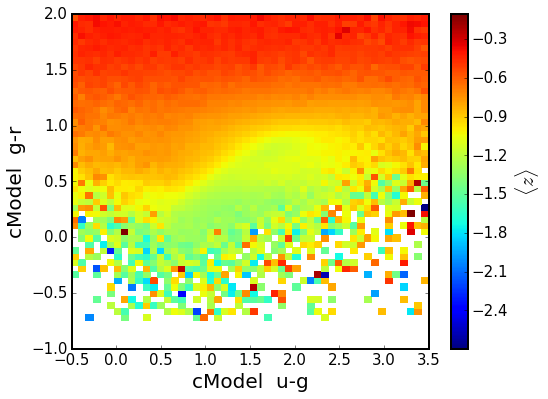

In [199]:

from matplotlib import rcParams      
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 20

fig,ax = plt.subplots(figsize=(8,6))



mag_type = 'cModel' # or psf 
m0  =  (tbdata[mag_type+'Mag_u'] > 0)*(tbdata[mag_type+'Mag_g'] > 0)
m = m0 * (tbdata['class'] == 'GALAXY' )
g = tbdata[mag_type+'Mag_g'][m] 
u = tbdata[mag_type+'Mag_u'][m]
r = tbdata[mag_type+'Mag_r'][m]
ug = u-g
gr = g-r 

m1 = (ug > -0.5) * (ug < 3.5 ) * (gr > -0.75)*( gr < 2)
x = ug[m1] 
y = gr[m1]
z = tbdata['z'][m][m1]

stats = binned_statistic_2d(x, y, values = z, statistic='mean', bins=50)

z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
# replace all nan's by 0 ...
z_sigma[np.isnan(z_sigma)] =0
z_reduce  =  z_sigma # [:-1, :-1] no need to reduce here because x_edges are already given with the right size
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display...
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)  # mask out zeros...

# Plot 2D histogram using pcolor
image = ax.pcolormesh(x_edges,y_edges,np.log10(z_masked), cmap='jet')  # np.log10(z_masked) gives log counts
ax.set_xlabel('cModel  u-g', fontsize=20)
ax.set_ylabel('cModel  g-r')
colorbar = fig.colorbar(image, ax = ax,  orientation='vertical')
colorbar.set_label(r'$\langle z \rangle$', fontsize=20)

fig.subplots_adjust(wspace=0.05)



In [113]:
np.unique( tbdata['subclass'][tbdata['Class']=='GALAXY'])

chararray(['', 'AGN', 'AGN BROADLINE', 'BROADLINE', 'STARBURST',
       'STARBURST BROADLINE', 'STARFORMING', 'STARFORMING BROADLINE'], 
      dtype='<U32')

In [131]:
# get names of EW lines ...

m = np.array([A.startswith('EW') for A in np.ravel(cols.names)])
EW_colnames = np.ravel(cols.names)[m]
print(EW_colnames)


['EW_OII_3726' 'EW_OII_3726_Err' 'EW_OII_3728' 'EW_OII_3728_Err'
 'EW_OIII_5006' 'EW_OIII_5006_Err' 'EW_Ha_6562' 'EW_Ha_6562_Err']


In [143]:
# bad data (missing line measurement...)
count = 0 
for line in EW_colnames : 
    c = np.sum(tbdata[line] == -9999)
    count += c
    print('%17s, has %d lines of bad data '%(line, c))


      EW_OII_3726, has 1113 lines of bad data 
  EW_OII_3726_Err, has 49379 lines of bad data 
      EW_OII_3728, has 1155 lines of bad data 
  EW_OII_3728_Err, has 60484 lines of bad data 
     EW_OIII_5006, has 3 lines of bad data 
 EW_OIII_5006_Err, has 17765 lines of bad data 
       EW_Ha_6562, has 255 lines of bad data 
   EW_Ha_6562_Err, has 16520 lines of bad data 


In [123]:
np.sum(tbdata['EW_OII_3726'] == -9999)

1113

In [153]:
# ensure that the query went well : there is no line where all 4 lines are missing...
m = (tbdata['EW_OII_3726'] == -9999)*(tbdata['EW_OII_3728'] == -9999)*\
    (tbdata['EW_OIII_5006'] == -9999)*(tbdata['EW_Ha_6562'] == -9999)
np.sum(m)

0

In [203]:
# choose good data based on : 
# having Oxygen filters,  g and r :
have_OII_EW = (tbdata['EW_OII_3726'] != -9999)*(tbdata['EW_OII_3728'] != -9999)

# have normal magnitudes 
mag_type = 'cModel' # or psf 
have_u_and_g  =  (tbdata[mag_type+'Mag_u'] > 0)*(tbdata[mag_type+'Mag_g'] > 0)

# are galaxies  
have_galaxy_class = tbdata['class'] == 'GALAXY' 

# have normal colors 
g = tbdata[mag_type+'Mag_g'] 
u = tbdata[mag_type+'Mag_u']
r = tbdata[mag_type+'Mag_r']
ug = u-g
gr = g-r 
have_normal_colors = (ug > -0.5) * (ug < 3.5 ) * (gr > -0.75)*( gr < 2)

# combine all masks
good_rows = have_OII_EW * have_u_and_g * have_galaxy_class * have_normal_colors
clean = tbdata[good_rows]
print('Good data: %d of %d'%(len(tbdata['EW_OII_3726'][good_rows]),  len(tbdata['EW_OII_3726'])))

Good data: 541743 of 554682


(2.2961898453980489e+38, 10000.0)

/Users/chris/anaconda3/lib/python3.5/site-packages/matplotlib/scale.py:123: RuntimeWarning: overflow encountered in multiply
  a = self._handle_nonpos(a * 10.0)


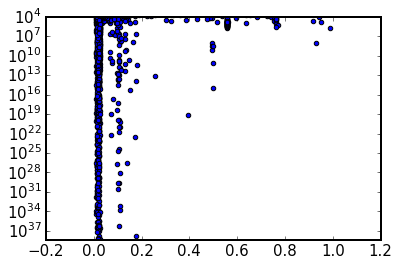

In [195]:
plt.scatter(tbdata['z'][good_rows], tbdata['Flux_OII_3726'][good_rows])
plt.yscale('log')
plt.ylim([0,1e4])

In [202]:
np.ravel(cols.names)

array(['specObjID', 'ra', 'dec', 'z', 'zErr', 'class', 'subClass',
       'EW_OII_3726', 'EW_OII_3726_Err', 'Flux_OII_3726',
       'Flux_OII_3726_Err', 'EW_OII_3728', 'EW_OII_3728_Err',
       'Flux_OII_3728', 'Flux_OII_3728_Err', 'EW_OIII_5006',
       'EW_OIII_5006_Err', 'Flux_OIII_5006', 'Flux_OIII_5006_Err',
       'EW_Ha_6562', 'EW_Ha_6562_Err', 'Flux_Ha_6562', 'Flux_Ha_6562_Err',
       'psfMag_u', 'psfMagErr_u', 'cModelMag_u', 'cModelMagErr_u',
       'psfMag_g', 'psfMagErr_g', 'cModelMag_g', 'cModelMagErr_g',
       'psfMag_r', 'psfMagErr_r', 'cModelMag_r', 'cModelMagErr_r',
       'psfMag_i', 'psfMagErr_i', 'cModelMag_i', 'cModelMagErr_i',
       'psfMag_z', 'psfMagErr_z', 'cModelMag_z', 'cModelMagErr_z'], 
      dtype='<U18')

8.3461
3.05512
2.61082
10.9304
8.29166
0.538391
1.61148
9.08839
4.76207
10.8096
5.1152


In [280]:
clean['Flux_OII_3726_3728'] = clean['Flux_OII_3726'] + clean['Flux_OII_3728']
mean_continuum = clean['Flux_OII_3726'] /  clean['EW_OII_3726']
clean['EW_OII_3726_3728'] = clean['Flux_OII_3726_3728']  / mean_continuum

/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in true_divide
  app.launch_new_instance()


/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log10
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid

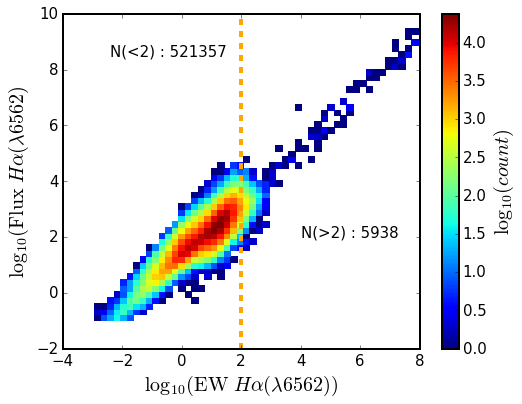

In [300]:
import gc ; gc.collect()
fig,ax = plt.subplots(figsize=(8,6))

# Note : Since OII lines are a doublet, they are treated as one
# thus I calculate continuum as  continuum = flux / EW  ,  
# and sum the fluxes to get combined EW : 
# flux_total = flux1 + flux2 
# EW_total = (flux1 + flux2) / mean(cont)

species = ['OII_3726_3728', 'OIII_5006','Ha_6562' ]
labels = ['OII (\lambda\lambda 3726,3728)' , 'OIII (\lambda  5006)',r'H \alpha (\lambda  6562)' ]
i = 2

x = np.log10(clean['EW_'+species[i]])
y = np.log10(clean['Flux_'+species[i]])
m = (x > -3) * (x<8) * (y>-1) * (y<10)
x = x[m]
y = y[m]
z = np.log10(clean['EW_'+species[i]])[m]

stats = binned_statistic_2d(x, y, values = z, statistic='count', bins=50)

z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
# replace all nan's by 0 ...
z_sigma[np.isnan(z_sigma)] =0
z_reduce  =  z_sigma # [:-1, :-1] no need to reduce here because x_edges are already given with the right size
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display...
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)  # mask out zeros...

# Plot 2D histogram using pcolor
image = ax.pcolormesh(x_edges,y_edges,np.log10(z_masked), cmap='jet')  # np.log10(z_masked) gives log counts
ax.set_xlabel(r'$ \log_{10}(\mathrm{EW} \,\, '+labels[i]+')$', fontsize=20)
ax.set_ylabel(r'$ \log_{10} (\mathrm{Flux} \,\, '+labels[i]+'$')
colorbar = fig.colorbar(image, ax = ax,  orientation='vertical')
colorbar.set_label(r'$\log_{10}(count)$', fontsize=20)

ax.axvline(2, ls='--', lw=4, c = 'orange')
ax.text(-2.4,8.5,'N(<2) : '+str(np.sum(x<2)))
ax.text(4,2,'N(>2) : '+str(np.sum(x>2)))

plt.savefig(species[i]+'EW_vs_Flux.png')